In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler

In [37]:
df = pd.read_csv("shopping_synthesized.csv")

In [ ]:
X = df[['age', 'spending_score']]
 
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)
 
 
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
 
 
cluster_names = {}
 
for i, c in enumerate(centroids_original):
    age, spending_score = c
 
    if age <= 31 and spending_score < 50:
        cluster_names[i] = "Young Low Income"
    elif age <= 31 and spending_score >= 50:
        cluster_names[i] = "Young High Income"
    elif age >= 30 and spending_score < 50:
        cluster_names[i] = "Old Low Income"
    elif age >= 30 and spending_score >= 50:
        cluster_names[i] = "Old High Income"
 
df['cluster_name'] = df['cluster'].map(cluster_names)
 
 
print(df.head())
print("\nCluster counts:")
print(df['cluster'].value_counts())
 
new_customer = [[9, 20]]
new_customer_scaled = scaler.transform(new_customer)
pred_cluster = kmeans.predict(new_customer_scaled)
 
print("\nPredicted Cluster:", pred_cluster[0])
print("Cluster Name:", cluster_names[pred_cluster[0]])

   Unnamed: 0  citizen_id first_name  last_name  age  annual_income  \
0           0     2617270     Thomas  Rodriguez   20      32.112204   
1           1     2610860    William      White   24     431.549786   
2           2     2615390     Thomas      Davis   58     773.566488   
3           3     2615191     Joseph   Williams   54     503.789458   
4           4     2615734    Michael    Johnson   53     639.459086   

   spending_score  cluster      cluster_name  
0              49        2  Young Low Income  
1               9        2  Young Low Income  
2              36        0    Old Low Income  
3              23        0    Old Low Income  
4              79        3   Old High Income  

Cluster counts:
cluster
0    2547
1    2512
2    2481
3    2460
Name: count, dtype: int64

Predicted Cluster: 2
Cluster Name: Young Low Income


c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
import matplotlib.pyplot as plt

[19999.999999999956, 12551.314727253804, 7950.391078402134, 5032.452651865894, 4266.458865889971, 3611.714205776095, 3066.8360725380808, 2608.2171959355196, 2202.004918637801, 2045.7107176200066]


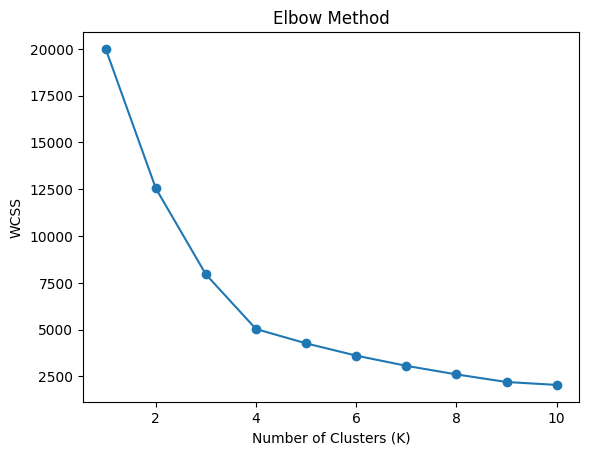

      Unnamed: 0  citizen_id first_name  last_name  age  annual_income  \
0              0     2617270     Thomas  Rodriguez   20      32.112204   
1              1     2610860    William      White   24     431.549786   
2              2     2615390     Thomas      Davis   58     773.566488   
3              3     2615191     Joseph   Williams   54     503.789458   
4              4     2615734    Michael    Johnson   53     639.459086   
...          ...         ...        ...        ...  ...            ...   
9995        9995     2614677      Karen      Jones   50      12.919535   
9996        9996     2612218       John   Martinez   42     722.570268   
9997        9997     2611389    Charles     Wilson   31     226.676715   
9998        9998     2614276     Robert        Lee   57     828.697419   
9999        9999     2611249      James     Taylor   58     553.804085   

      spending_score  cluster      cluster_name  
0                 49        2  Young Low Income  
1          

c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
wcss = []
 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)
 
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()
 
df['cluster_name'] = df['cluster'].map(cluster_names)
print(df)
 
print(df['cluster'].value_counts())
 
#prediction
 
 
new_customer = [[56, 16]]
 
new_customer_scaled = scaler.transform(new_customer)
 
predicted_cluster = kmeans.predict(new_customer_scaled)
 
print("Predicted cluster:", predicted_cluster)

Extra

In [42]:
X = df[["age", "spending_score"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

# Assign cluster labels to dataframe
df['cluster'] = labels

# Name clusters based on age and spending_score
cluster_names = {}
for i, c in enumerate(centroids_original):
    age, spending_score = c
    if age < 31 and spending_score < 50:
        cluster_names[i] = "Young Low Income"
    elif age < 31 and spending_score >= 50:
        cluster_names[i] = "Young High Income"
    elif age >= 30 and spending_score < 50:
        cluster_names[i] = "Old Low Income"
    else:
        cluster_names[i] = "Old High Income"

df['cluster_name'] = df['cluster'].map(cluster_names)

# Show results
# print(df)
print(df['cluster'].value_counts())

# Predict for a new customer (must scale first!)
new_customer = [[56, 16]]
new_customer_scaled = scaler.transform(new_customer)
print(kmeans.predict(new_customer_scaled))

cluster
0    2547
1    2512
2    2481
3    2460
Name: count, dtype: int64
[0]


c:\Users\thriam\WorkSpaces\mercml\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
